In [1]:
import numpy as np
from scipy.optimize import optimize
from scipy.special import expit
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import clear_output

In [2]:
# Sample -KL(q || p)
def sample_mdkl(log_alpha):
    eps = 1 + np.exp(0.5 * log_alpha) * np.random.randn(*log_alpha.shape)
    return 0.5 * log_alpha - np.log(np.abs(eps))

In [3]:
# Estimate -KL on a grid
M = 1000
log_alpha_grid = np.linspace(-10, 10, M)
mdkl_sampled = np.zeros(M)
K = 100000
for i in range(100):
    print(i)
    mdkl_sampled += 0.01 * sample_mdkl(np.tile(log_alpha_grid, K).reshape(K, M)).mean(axis=0)
    clear_output()
C = sample_mdkl(np.tile([20], 100000000)).mean()

In [4]:
def mdkl_approx(log_alpha, k1, k2, k3):
    return k1 * expit(k2 + k3 * log_alpha) - 0.5 * np.log1p(np.exp(-log_alpha))

def mdkl_approximation_loss(x):
    k1, k2, k3 = x
    return np.sum((mdkl_sampled - mdkl_approx(log_alpha_grid, k1, k2, k3)) ** 2)

In [5]:
k1, k2, k3 = optimize.fmin(mdkl_approximation_loss, x0=np.array([0., 0., 0.]))
print('k1, k2, k3 =', k1, k2, k3)

Optimization terminated successfully.
         Current function value: 0.009276
         Iterations: 188
         Function evaluations: 340
k1, k2, k3 = 0.636189384063 1.8747510114 1.48840725372


C:\Users\dmolc\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


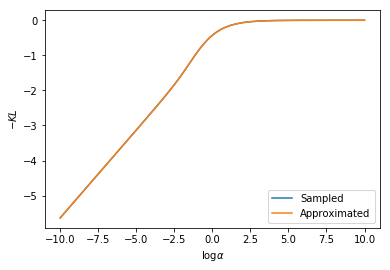

In [6]:
plt.plot(log_alpha_grid, mdkl_sampled - C, label='Sampled')
plt.plot(log_alpha_grid, mdkl_approx(log_alpha_grid, k1, k2, k3) - C, label='Approximated')
_ = plt.axes().set_xlabel(r'$\log\alpha$') 
_ = plt.axes().set_ylabel(r'$-KL$') 
_ = plt.legend(loc=4)

C:\Users\dmolc\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


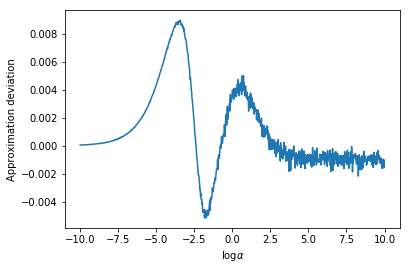

In [13]:
plt.plot(log_alpha_grid, mdkl_sampled - mdkl_approx(log_alpha_grid, k1, k2, k3))
_ = plt.axes().set_xlabel(r'$\log\alpha$') 
_ = plt.axes().set_ylabel(r'Approximation deviation') 